# European Tour Destinations Dataset


## 1. Introducao

- Nesta analise foram explorados diversos dados relacionados a destinos turisticos ao redor da europa. Com o objetivo de identificar tendencias e insights sobre paises,comidas,religiao,moeda local, entre outras areas. Os dados foram retirados de um dataset proveniente do site KAGGLE.

## 2. Carregamento e Preparação dos Dados

### 2.1. Importacao das bibloiotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Carregamento dos dados

In [2]:
df = pd.read_excel(r'/Users/christophe/Downloads/destinations.xlsx') #Substitua pelo seu local de arquivo
print(df.head()) 
print(len(df))  

  Destination    Region Country Category   Latitude  Longitude  \
0        Rome     Lazio   Italy     City  41.902782  12.496366   
1    Florence   Tuscany   Italy     City  43.769581  11.255772   
2      Venice    Veneto   Italy     City  45.435559  12.336196   
3       Milan  Lombardy   Italy     City  45.464643   9.188540   
4      Naples  Campania   Italy     City  40.851330  14.254720   

  Approximate Annual Tourists Currency Majority Religion  \
0                  14 million     Euro    Roman Catholic   
1                  10 million     Euro    Roman Catholic   
2                  10 million     Euro    Roman Catholic   
3                   7 million     Euro    Roman Catholic   
4                   5 million     Euro    Roman Catholic   

                   Famous Foods Language  \
0          Pizza, Pasta, Gelato  Italian   
1          Pizza, Pasta, Gelato  Italian   
2          Pizza, Pasta, Gelato  Italian   
3  Risotto, Ossobuco, Panettone  Italian   
4         Pizza, Pasta

- O dataframe possui 39 colunas com 1013 linhas

In [3]:
df.describe()

,Latitude,Longitude
count,209.000000,209.000000
mean,48.381503,12.397526
std,8.203389,20.545257
min,32.652843,-22.189722
25%,43.257158,4.886067
50%,47.557778,9.741326
75%,53.480958,18.955689
max,69.649328,158.624312


In [4]:
perct_missing_values = df.isnull().sum()*100 / len(df)
perct_missing_values.sort_values()

Destination                     0.000000
Region                          0.000000
Country                         0.000000
Category                        0.000000
Latitude                        0.000000
Longitude                       0.000000
Approximate Annual Tourists     0.000000
Currency                        0.000000
Majority Religion               0.000000
Famous Foods                    0.000000
Language                        0.000000
Best Time to Visit              0.000000
Cost of Living                  0.000000
Safety                          0.000000
Cultural Significance           0.000000
Description                    23.923445
dtype: float64

In [5]:
print(df.info())

df = df.drop_duplicates() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

**Observação:**
- Os dados foram carregados do arquivo `destinations.xlsx`.
- Duplicatas foram removidas para garantir a qualidade dos dados.

## 3. Analise Demografica e geografica

- Por se tratar de um dataset financeiro, o mesmo contem um grande volume de dados relacionados a precos. Por isso, essa secao sera dividida em analisar o preco das comodites(que tambem estao subdivididas), das criptomoedas e do valor de mercado das empresas presentes no arquivo

- Ao se lidar com esse tipo de dados e seu volume, foi necessario analisar os preco de ano em ano para evitar sobrecarregamento e erros 

In [51]:
import pandas as pd
import numpy as np

#
# Exibir dados originais antes da conversão
print("Dados originais da França:")
print(df[df['Country'].str.lower() == 'france'])

# Função para converter valores da coluna 'Approximate Annual Tourists' apenas para a França
def convert_france_tourists(value):
    if isinstance(value, str):
        # Se a palavra 'million' estiver presente
        if 'million' in value:
            # Extrair o número antes da palavra "million"
            number_part = value.split()[0]  # pega o primeiro elemento
            try:
                return float(number_part) * 1_000_000  # multiplica por 1.000.000
            except ValueError:
                return np.nan  # Retorna NaN para valores não convertíveis
    return value  # Retorna o valor original se não for uma string

# Aplicar a conversão apenas para a França
df.loc[df['Country'].str.lower() == 'frança', 'Approximate Annual Tourists'] = df.loc[df['Country'].str.lower() == 'frança', 'Approximate Annual Tourists'].apply(convert_france_tourists)

# Exibir dados convertidos para a França
print("\nDados convertidos para a França:")
print(df[df['Country'].str.lower() == 'frança'])


Dados originais da França:
          Destination                      Region Country        Category  \
20              Paris               Île-de-France  France            City   
21               Nice  Provence-Alpes-Côte d'Azur  France    Coastal City   
22          Marseille  Provence-Alpes-Côte d'Azur  France    Coastal City   
23               Lyon        Auvergne-Rhône-Alpes  France            City   
24           Bordeaux          Nouvelle-Aquitaine  France            City   
25         Strasbourg                   Grand Est  France            City   
26             Cannes  Provence-Alpes-Côte d'Azur  France    Coastal City   
27  Mont Saint-Michel                    Normandy  France          Island   
28       Loire Valley         Centre-Val de Loire  France          Region   
29        French Alps        Auvergne-Rhône-Alpes  France  Mountain Range   

     Latitude  Longitude  Approximate Annual Tourists Currency  \
20  48.856614   2.352222                          NaN     E

/var/folders/lh/kgkxn3f536nfn07l9g_kbxb00000gn/T/ipykernel_1847/2998342019.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Destination', y='Approximate Annual Tourists', data=top_destinos, palette='Blues_d')


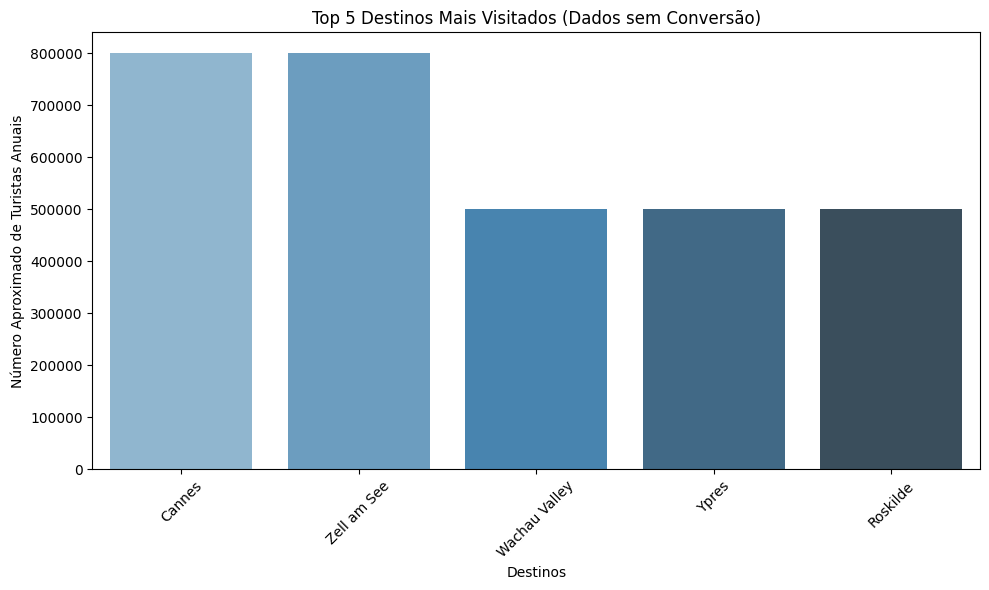

In [18]:
# Converter a coluna 'Approximate Annual Tourists' para numérico (float)
#df['Approximate Annual Tourists'] = pd.to_numeric(df['Approximate Annual Tourists'], errors='coerce')

# Ordenar os destinos pelo número de turistas anuais em ordem decrescente
#top_destinos = df.sort_values(by='Approximate Annual Tourists', ascending=False)

# Mostrar os 5 destinos mais visitados
#print(top_destinos[['Country', 'Approximate Annual Tourists']].head(10))

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os 5 destinos mais visitados (sem converter para numérico)
top_destinos = df.sort_values(by='Approximate Annual Tourists', ascending=False).head(5)

# Criar o gráfico diretamente usando as strings como estão
plt.figure(figsize=(10, 6))
sns.barplot(x='Destination', y='Approximate Annual Tourists', data=top_destinos, palette='Blues_d')

plt.title('Top 5 Destinos Mais Visitados (Dados sem Conversão)')
plt.xlabel('Destinos')
plt.ylabel('Número Aproximado de Turistas Anuais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
